<a href="https://colab.research.google.com/github/edermartelinho/Aprendizado_de_Maquina/blob/main/Aprendizado_de_Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### * Importando as Bibliotecas para as Análises

In [ ]:
!pip install pandas-flavor==0.1.1
!pip install -U pingouin
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00


## * Importar Bibliotecas Para Utilizar no Aprendizado de Máquina

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # KFold Class.

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Métodos Não Supervisionado

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# * Importando o Banco Pelo Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Quando for realizar aprendizado de máquina só é para deixar no banco as variáveis independentes e uma variável dependente

datasetDiabets=pd.read_csv('/content/drive/MyDrive/Curso_Ciencias_de_Dados/Diabetes.csv')
#datasetDiabets

# * ***Aprendizado de Máquina***

### * **Identificando as Variáveis Dependentes, ou seja, as características que irão ajudar na classificação**

In [ ]:
#array = datasetDiabets.values
X = datasetDiabets.drop(columns='Saudavel') #identificando as variáveis independentes
Y = datasetDiabets['Saudavel'] # identificando a variável dependente

### * **Separando os Dados de Validação e Treinamento**

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.15, random_state=30)

#random_state é o gerador da amostra de forma aleatória,
#faz com que as amostras de treino e validação sejam determinística.
#Quando não é utilizada ela será diferente,a cada vez que vc chamar as amostras

#test_size é a proporção de amostra para validação

### * **Criando uma Lista dos Modelos de Classificação Que Serão Avaliados**

In [ ]:
# Modelos Supervisionados que serão testados
models = []
models.append(LogisticRegression(solver='liblinear', multi_class='ovr'))
models.append(LinearDiscriminantAnalysis())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(SVC(gamma='auto'))


### * **Criando uma Lista com os Nomes Abreviados dos Modelos**

In [ ]:
nome = ['LR','LDA','KNN','DT','NB','SVM']

### * **Aplicando os Modelos Supervisionados**

In [ ]:
results = [] #lista com os resultados de cada modelo
acuracia=[]
erro=[]
n=0

for model in models:
   Models_results = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

   results.append(Models_results)
   msg = "%s: %f (%f)" % (nome[n],round(Models_results.mean(),2), Models_results.std())
   acuracia.append(round(Models_results.mean(),2))
   erro.append(Models_results.std())
   n=n+1
   print(msg)

#scoring = 'accuracy' #Métrica Utiliza Para Avaliar os Modelos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 1.000000 (0.000000)
LDA: 1.000000 (0.000000)
KNN: 0.990000 (0.002602)
DT: 0.900000 (0.131992)
NB: 0.960000 (0.042106)
SVM: 0.650000 (0.002079)


### * **Avaliando o Modelo Graficamente**

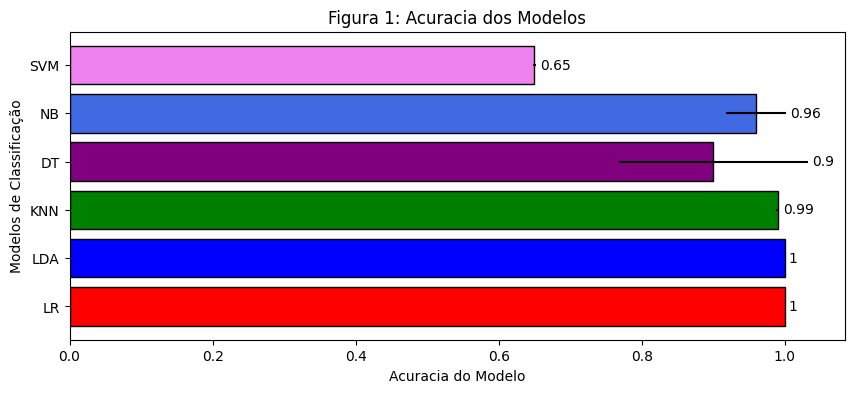

In [ ]:
plt.figure(figsize = (10,4))
plt.title('Figura 1: Acuracia dos Modelos')


barWidth=0.15

r=np.arange(len(nome))
a=plt.barh(nome, acuracia, color=['red','blue','g','purple','royalblue','violet'], xerr= erro, edgecolor='black')


plt.bar_label(a, padding=3)

# Adicionando Legendas as Barras
#plt.xticks([r+3.5*barWidth for r in range(len(nome))], ['Especificidade-Não-Diabética', 'Sensibilidade-Diabética'])
plt.ylabel('Modelos de Classificação')
plt.xlabel('Acuracia do Modelo')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
#fancybox=True, shadow=True, ncol=6)

plt.show()
#a=plt.bar(r+barWidth, DadosPrevisao1, color=['red'], width=barWidth, bottom=0, label=nome[0], edgecolor='black',hatch='o')


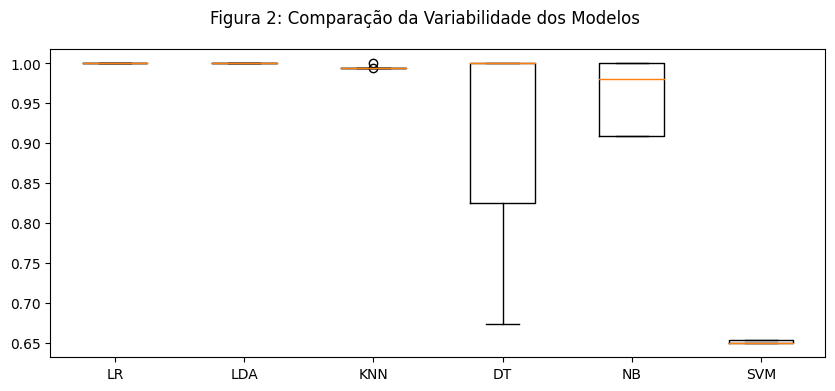

In [ ]:
fig = plt.figure(figsize = (10,4))
fig.suptitle('Figura 2: Comparação da Variabilidade dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(nome)
plt.show()

### * **Interpretação Gráfica:**

A regressão logística, análise de discriminante e o KNN apresentaram as melhores acurácia, é possível também verificar através do boxplot dos resultados que o naive bayes também apresentou uma menor variação na previsão dos resultados.

### * **Avaliação do Modelo de Regressão Logística**

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')
logistic_model.fit(X_train, Y_train) ## Criando o modelo

# Avaliação do Modelo

Previsao = logistic_model.predict(X_validation) ## realizando a classificação a partir das caracteristicas
print('Relatório de Clasfficação - Regressão Logistica: \n', classification_report(Y_validation, Previsao))

Relatório de Clasfficação - Regressão Logistica: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        56

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### * ***Interpretação dos Resultados:***
### Observa-se que a regressão logística apresentou a melhor acurácia com 100%. Verifica-se na análise de classificação que o Recall apresentou 100% de acerto para classificação dos diabéticos e também dos não diabéticos. Ou seja, o modelo conseguiu identificar os pacientes. Isso mostra que o modelo se ajusta bem para realização de previsão.

## * **Interpretação da Matriz de Confusão**

In [ ]:
MatrizConfusao1=pd.crosstab(Y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao1

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,94,0
1,0,60


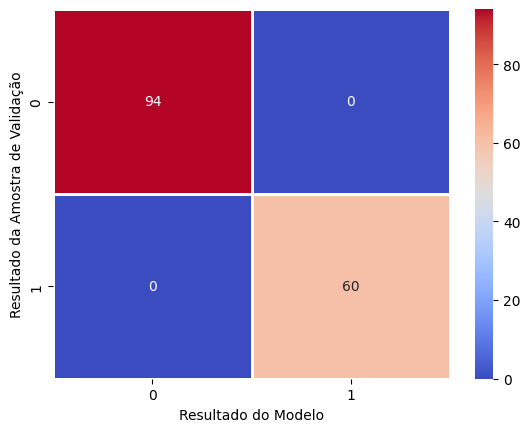

In [ ]:
sns.heatmap(MatrizConfusao1, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### * ***Interpretação dos Resultados:***
Na matriz de confusão, é possível observar que todos os pacientes foramclassificados corretamente.

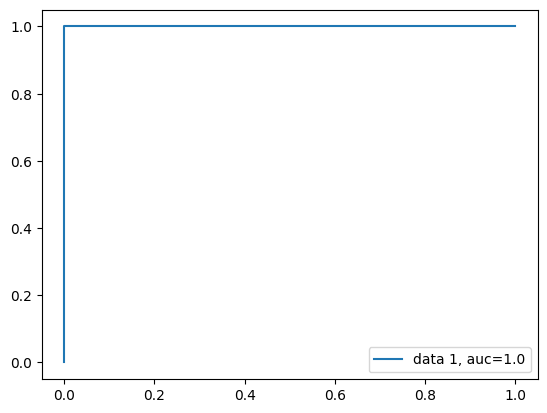

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_validation, Previsao)
auc = metrics.roc_auc_score(Y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.show()

## * Interpretação:

Observa-se que a área sob a curva é de 1.0, ou seja, o modelo de regressão logística consegue classificar 100% dos dados.

### **Modelo de Análise Discriminante**

In [ ]:
Modelo=LinearDiscriminantAnalysis()
Modelo.fit(X_train, Y_train) ## Criando o modelo
Previsao = Modelo.predict(X_validation) ## realizando a classificação a partir das caracteristicas
print('Relatório de Clasfficação - Analise de Discriminante: \n', classification_report(Y_validation, Previsao))

Relatório de Clasfficação - Analise de Discriminante: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        57

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
MatrizConfusao2=pd.crosstab(Y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao2

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,94,0
1,0,60


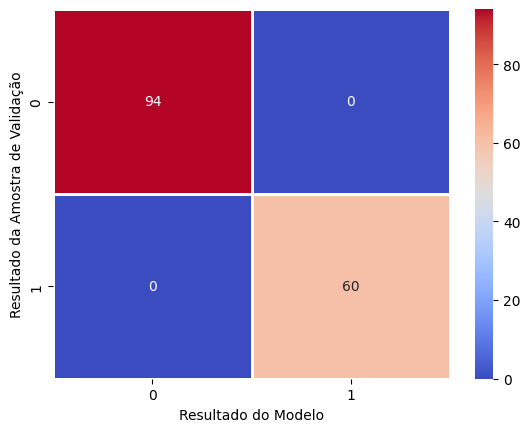

In [ ]:
sns.heatmap(MatrizConfusao2, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

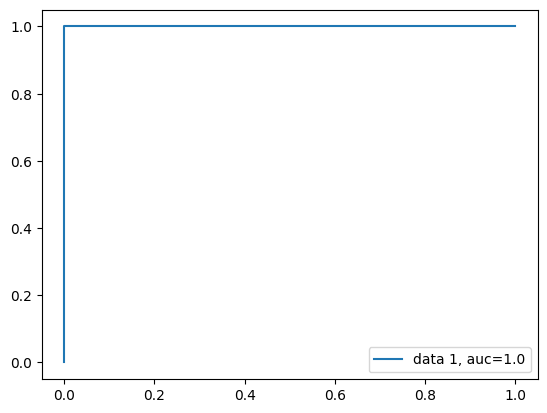

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_validation, Previsao)
auc = metrics.roc_auc_score(Y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## * Interpretação:

Observa-se que a área sob a curva é de 1.0, ou seja, o modelo de análise de discriminante consegue classificar 100% dos dados.

### **Modelo KNN**

In [ ]:
Modelo=KNeighborsClassifier()
Modelo.fit(X_train, Y_train) ## Criando o modelo
Previsao = Modelo.predict(X_validation) ## realizando a classificação a partir das caracteristicas
print('Relatório de Clasfficação - Analise de Discriminante: \n', classification_report(Y_validation, Previsao))

Relatório de Clasfficação - Analise de Discriminante: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        97
           1       1.00      0.98      0.99        57

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [ ]:
MatrizConfusao3=pd.crosstab(Y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao3

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,94,0
1,1,59


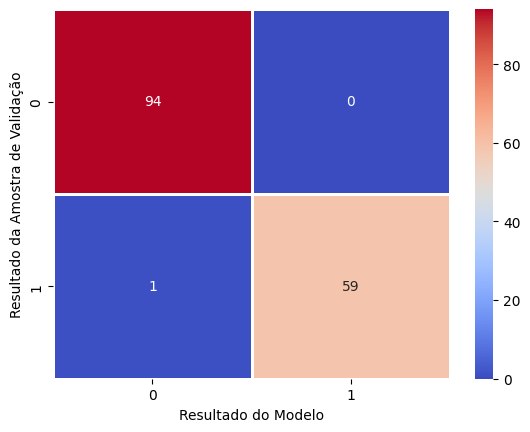

In [ ]:
sns.heatmap(MatrizConfusao3, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

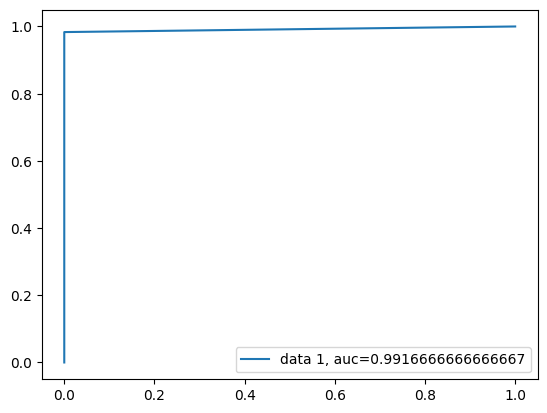

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_validation, Previsao)
auc = metrics.roc_auc_score(Y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## * Interpretação:

Observa-se que a área sob a curva é de 0.9917, ou seja, o modelo de KNN consegue classificar bem 99,17% dos dados.

### **Modelo Naive Bayes**

In [ ]:
Modelo=GaussianNB()
Modelo.fit(X_train, Y_train) ## Criando o modelo
Previsao = Modelo.predict(X_validation) ## realizando a classificação a partir das caracteristicas
print('Relatório de Clasfficação - Analise de Discriminante: \n', classification_report(Y_validation, Previsao))

Relatório de Clasfficação - Analise de Discriminante: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        97
           1       0.95      0.95      0.95        57

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



In [ ]:
MatrizConfusao4=pd.crosstab(Y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao4

Resultado do Modelo,0,1
Resultado da Amostra de Validação,,
0,92,2
1,2,58


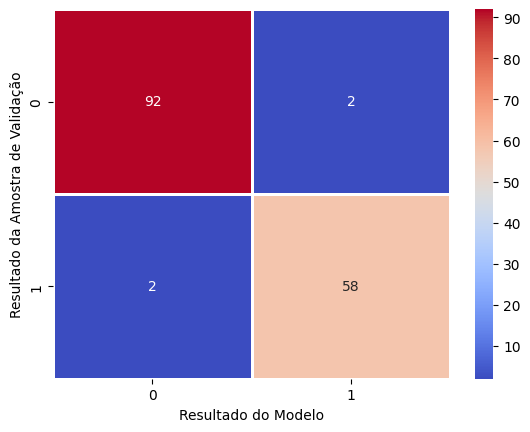

In [ ]:
sns.heatmap(MatrizConfusao4, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

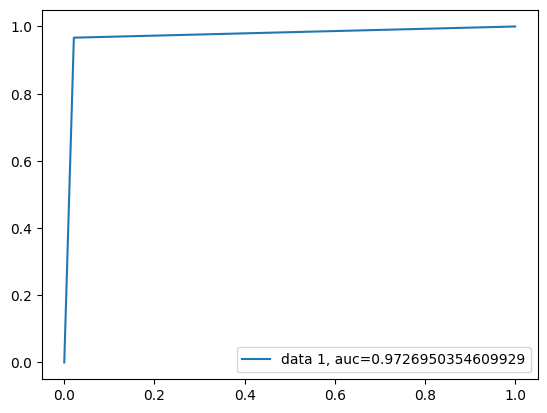

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_validation, Previsao)
auc = metrics.roc_auc_score(Y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## * Interpretação:

Observa-se que a área sob a curva é de 0.97, ou seja, o modelo de regressão logística consegue classificar 97,27% dos dados.

### **Modelo SVM**

In [ ]:
Modelo=SVC(gamma='auto')
Modelo.fit(X_train, Y_train) ## Criando o modelo
Previsao = Modelo.predict(X_validation) ## realizando a classificação a partir das caracteristicas
print('Relatório de Clasfficação - Analise de Discriminante: \n', classification_report(Y_validation, Previsao))

Relatório de Clasfficação - Analise de Discriminante: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        97
           1       0.00      0.00      0.00        57

    accuracy                           0.63       154
   macro avg       0.31      0.50      0.39       154
weighted avg       0.40      0.63      0.49       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
MatrizConfusao5=pd.crosstab(Y_validation, Previsao, rownames=['Resultado da Amostra de Validação'],colnames=['Resultado do Modelo'], normalize=False, margins=False)
MatrizConfusao5

Resultado do Modelo,0
Resultado da Amostra de Validação,
0,94
1,60


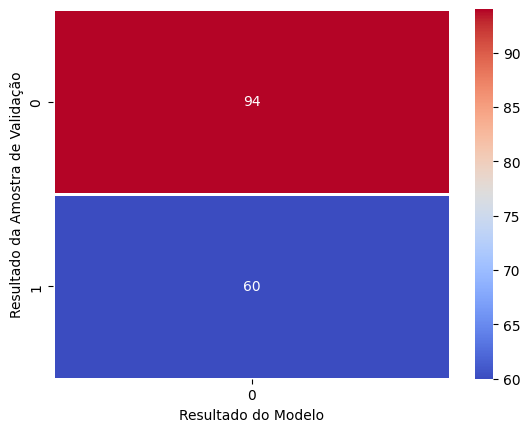

In [ ]:
sns.heatmap(MatrizConfusao5, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

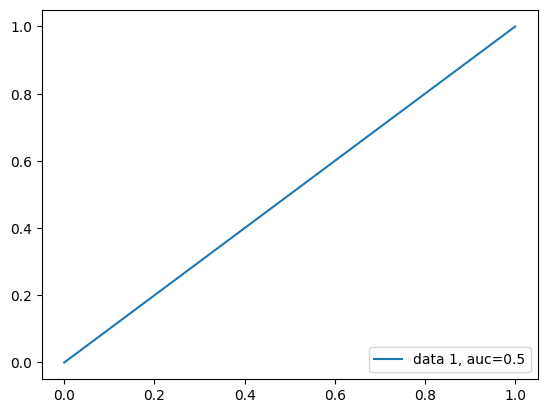

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_validation, Previsao)
auc = metrics.roc_auc_score(Y_validation, Previsao)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## * Interpretação:

Observa-se que a área sob a curva é de 0.5, ou seja, o modelo SVM só conseguiu classificar 50% dos dados.

### **Gráfico De Avaliação da Especificidade e Sensibilidade dos Modelos**

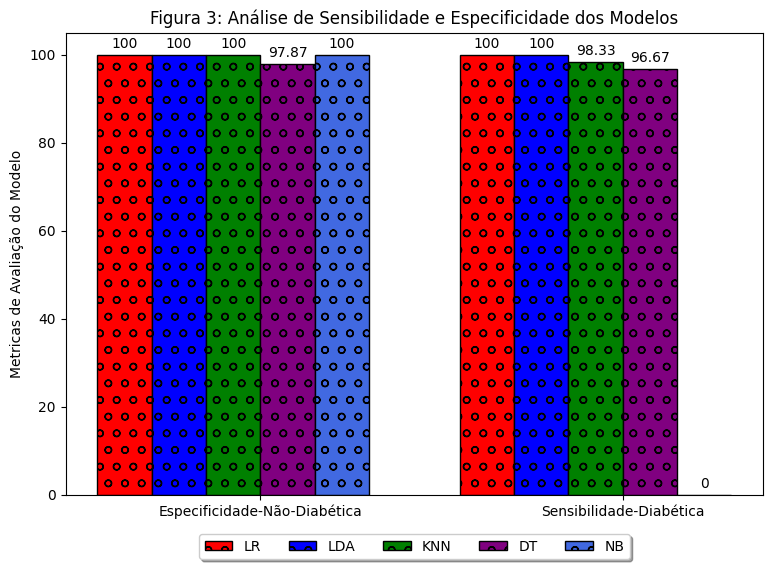

In [ ]:
DadosPrevisao1=[round((MatrizConfusao1[0][0]/(MatrizConfusao1[0][0]+MatrizConfusao1[1][0]))*100,2),round((MatrizConfusao1[1][1]/(MatrizConfusao1[0][1]+MatrizConfusao1[1][1]))*100,2)]
DadosPrevisao2=[round((MatrizConfusao2[0][0]/(MatrizConfusao2[0][0]+MatrizConfusao2[1][0]))*100,2),round((MatrizConfusao2[1][1]/(MatrizConfusao2[0][1]+MatrizConfusao2[1][1]))*100,2)]
DadosPrevisao3=[round((MatrizConfusao3[0][0]/(MatrizConfusao3[0][0]+MatrizConfusao3[1][0]))*100,2),round((MatrizConfusao3[1][1]/(MatrizConfusao3[0][1]+MatrizConfusao3[1][1]))*100,2)]
DadosPrevisao4=[round((MatrizConfusao4[0][0]/(MatrizConfusao4[0][0]+MatrizConfusao4[1][0]))*100,2),round((MatrizConfusao4[1][1]/(MatrizConfusao4[0][1]+MatrizConfusao4[1][1]))*100,2)]
DadosPrevisao5=[round((MatrizConfusao5[0][0]/MatrizConfusao5[0][0])*100,2),round(0,2)]

plt.figure(figsize=(9,6))

barWidth=0.15

r=np.arange(len(DadosPrevisao1))
a=plt.bar(r+barWidth, DadosPrevisao1, color=['red'], width=barWidth, bottom=0, label=nome[0], edgecolor='black',hatch='o')
b=plt.bar(r+2*barWidth, DadosPrevisao2, color=['blue'], width=barWidth, bottom=0, label=nome[1], edgecolor='black',hatch='o')
c=plt.bar(r+3*barWidth, DadosPrevisao3, color=['g'], width=barWidth, bottom=0, label=nome[2], edgecolor='black',hatch='o')
d=plt.bar(r+4*barWidth, DadosPrevisao4, color=['purple'], width=barWidth, bottom=0, label=nome[3], edgecolor='black',hatch='o')
e=plt.bar(r+5*barWidth, DadosPrevisao5, color=['royalblue'], width=barWidth, bottom=0, label=nome[4], edgecolor='black',hatch='o')




plt.bar_label(a, padding=3)
plt.bar_label(b, padding=3)
plt.bar_label(c, padding=3)
plt.bar_label(d, padding=3)
plt.bar_label(e, padding=3)

plt.title('Figura 3: Análise de Sensibilidade e Especificidade dos Modelos')

# Adicionando Legendas as Barras
plt.xticks([r+3.5*barWidth for r in range(len(DadosPrevisao1))], ['Especificidade-Não-Diabética', 'Sensibilidade-Diabética'])
plt.ylabel('Metricas de Avaliação do Modelo')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=6)
#plt.savefig("/home/mariese/Documentos/Ypython/PorcentagemDescarregados",dpi=300)
plt.savefig("/content/drive/MyDrive/Curso_Ciencias_de_Dados/SenEsp.png",dpi=300) #Para Salvar no Drive
plt.show()

### * **Interpretação:**

Os modelos de Regressão Logística (RL) e Análise de Discriminante (LDA) apresentaram as maiores e a mesma acurácia de 100,0 %, como mostra a Figura 1. Devido a este fato, todos foram avaliados com relação a especificidade e sensibilidade. Observando a Figura 3, esses modelos apresentaram uma sensibilidade e especificidade de 100%. O modelo KNN, uma sensibilidade de 98,3% e especificidade de 100%. Temos que encontrar um modelo que além de ter uma boa acurácia, também tenha um equilíbrio entre a taxa de senbilidade e especificidade. Observando todos esses fatores os modelos de regressão logística e Análise de Discriminante foi o escolhido para classificar os dados.

In [ ]:
Especificidade=[round((MatrizConfusao1[0][0]/(MatrizConfusao1[0][0]+MatrizConfusao1[1][0]))*100,2), round((MatrizConfusao2[0][0]/(MatrizConfusao2[0][0]+MatrizConfusao2[1][0]))*100,2), round((MatrizConfusao3[0][0]/(MatrizConfusao3[0][0]+MatrizConfusao3[1][0]))*100,2), round((MatrizConfusao4[0][0]/(MatrizConfusao4[0][0]+MatrizConfusao4[1][0]))*100,2),round((MatrizConfusao5[0][0]/MatrizConfusao5[0][0])*100,2)]

Sensibilidade=[round((MatrizConfusao1[1][1]/(MatrizConfusao1[0][1]+MatrizConfusao1[1][1]))*100,2), round((MatrizConfusao2[1][1]/(MatrizConfusao2[0][1]+MatrizConfusao2[1][1]))*100,2), round((MatrizConfusao3[1][1]/(MatrizConfusao3[0][1]+MatrizConfusao3[1][1]))*100,2), round((MatrizConfusao4[1][1]/(MatrizConfusao4[0][1]+MatrizConfusao4[1][1]))*100,2), round(0,2)]



metrics.plot_roc_curve(Especificidade, Sensibilidade)
plt.show()

NameError: name 'plot_roc_curve' is not defined